1.Set up Environment

In [255]:
import warnings
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import pandas_datareader as pdr
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module
import datetime as dt
from alpha_vantage.timeseries import TimeSeries
from scipy import stats #The SciPy stats module
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

Store API Key

In [267]:
from my_secrets import IEX_CLOUD_API_TOKEN
price_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=TSLA&outputsize=compact&apikey=IEX_CLOUD_API_TOKEN&datatype=json'
ts = TimeSeries(price_url, output_format='pandas')
data, meta = ts.get_weekly('TSLA')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-12-16,176.10,177.3700,150.040,150.23,687706165.0
2022-12-09,189.44,191.2700,169.060,179.05,471983601.0
2022-12-02,179.96,198.9200,178.750,194.86,439273798.0
2022-11-25,175.85,185.2000,166.185,182.86,331544487.0
2022-11-18,192.77,200.8237,176.550,180.19,390472869.0
...,...,...,...,...,...
2010-08-06,20.50,22.1800,19.520,19.59,4399700.0
2010-07-30,21.50,21.5000,19.550,19.94,3052000.0
2010-07-23,21.37,22.2500,19.500,21.29,7175700.0


In [249]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

Stochastic Oscillator

In [265]:
#now they are in the 7 day high and low with the 7 day close 
#value abouve 75 is a sell and below 25 is a buy 
#this is the right format but the values are not the same as yahoo finance
#the api data does not account for reverse stock splits which has an effect on the data
LOW_14 = data['low'].rolling(2).min()
HIGH_14 = data['high'].rolling(2).max()
C = data['close']
K = ((C - LOW_14) * 100 / (HIGH_14 - LOW_14))
Dvalue = K.rolling(1).mean()


<AxesSubplot: xlabel='date'>

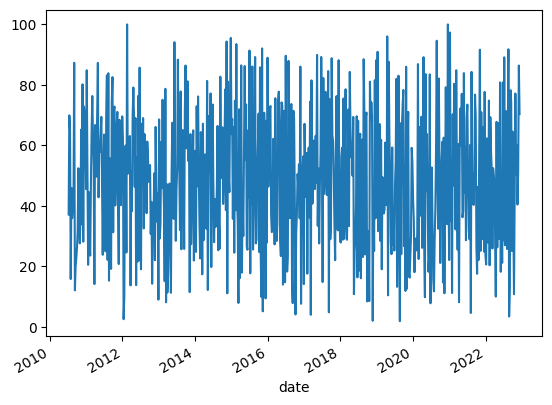

In [266]:
Dvalue.plot()

MACD Parameter

In [252]:
#calculates divergence of stock price momentum 
#'series_type' can be high, low, close, open
#MACD should be above zero for a buy, and below zero for a sell.
macd_url = 'https://www.alphavantage.co/query?function=MACD&symbol=TSLA&interval=weekly&series_type=close&apikey=IEX_CLOUD_API_TOKEN&datatype=json'
macdata = requests.get(macd_url).json()

In [ ]:
mcolumns = ['Meta Data', 'Technical Analysis: MACD']
macdata.columns = mcolumns
macdata.head

Bollinger Bands Parameter

In [ ]:
#if middle band > upper band = overpriced(sell_signal)
#if middle band < lower band = oversold(buy_signal)
bband_url = 'https://www.alphavantage.co/query?function=BBANDS&symbol=AAPL&interval=weekly&time_period=5&series_type=close&nbdevup=3&nbdevdn=3&apikey=IEX_CLOUD_API_TOKEN'
bband = requests.get(bband_url).json()
bband